# Task 4: Loan Approval Prediction 
## Introduction:
This notebook includes Loan approval prediction using the loan approval dataset. Data cleaning, visualization, SMOTE Logistic Regression, Decision Tree and models are evaluated using precision, recall, F1-score, confusion matrix.


## 2. Import Libraries and load dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv("loan_approval_dataset.csv")

## 3. Preprocessing

In [5]:
df.shape

(4269, 13)

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None


In [13]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [16]:
display("\nFirst 5 rows:\n", df.head())

'\nFirst 5 rows:\n'

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


missing values:

## 4. Data Cleaning

In [17]:
print(df.isnull().sum())

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


#### cleaning column names:

In [18]:
df.columns = df.columns.str.strip()
print(df.columns.tolist())

['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


## 5. Target column check (usually 'Loan_Status' or similar)

In [22]:
print("\nUnique values in loan_status:\n", df['loan_status'].value_counts())


Unique values in loan_status:
 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


##### visualizing approved and rejected applications

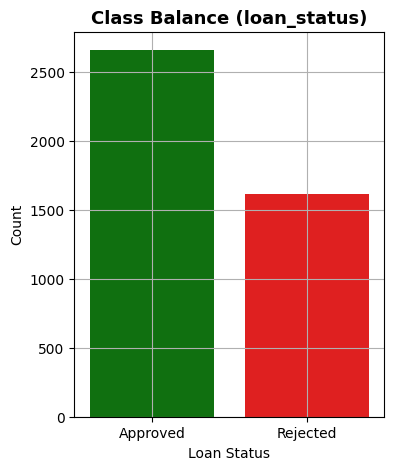

In [41]:
plt.figure(figsize=(4, 5))
order = ['Approved', 'Rejected']
sns.countplot(x='loan_status', data=df, order=order, palette=['green','red'])
plt.title("Class Balance (loan_status)", fontsize=13, weight='bold')
plt.xlabel("Loan Status", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.grid(True)
plt.show()

#### column id is extra we dont need it so we can drop that

In [43]:
if 'loan_id' in df.columns:
    df.drop(columns=['loan_id'], inplace=True)

In [44]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']

## 6. Identifing Features:
Categorical & Numeric Features:

In [45]:
num_cols = X.select_dtypes(include=[np.number]).columns
cat_cols = X.select_dtypes(exclude=[np.number]).columns

#### numeric:

In [46]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

#### Categroical:

In [47]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [48]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

In [49]:
X_clean = preprocessor.fit_transform(X)
print("\nShape after preprocessing:", X_clean.shape)


Shape after preprocessing: (4269, 13)


## 7. Train and test split

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (3415, 13)
Test shape: (854, 13)


## 8. Logistic Regression and Decision Tree

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix



In [53]:

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

Logistic Regression:
              precision    recall  f1-score   support

    Approved       0.93      0.95      0.94       531
    Rejected       0.92      0.88      0.90       323

    accuracy                           0.92       854
   macro avg       0.92      0.91      0.92       854
weighted avg       0.92      0.92      0.92       854

Confusion Matrix:
 [[505  26]
 [ 40 283]]


In [54]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("\nDecision Tree:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree:
              precision    recall  f1-score   support

    Approved       0.97      0.98      0.98       531
    Rejected       0.97      0.96      0.96       323

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854

Confusion Matrix:
 [[522   9]
 [ 14 309]]


#### Displaying Confusion Matrix

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay

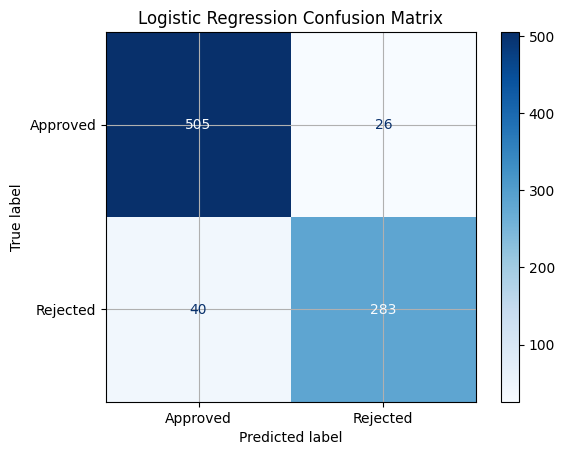

In [95]:
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.grid(True)
plt.show()

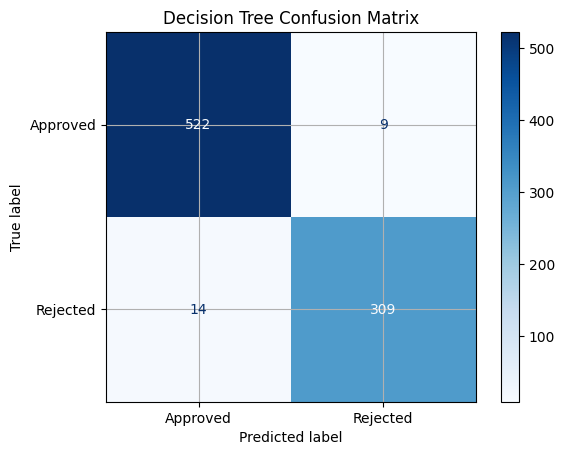

In [96]:
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test, cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.grid(True)
plt.show()

### Precision-Recall Curve
dataset is imbalance so
PR curve is better than ROC

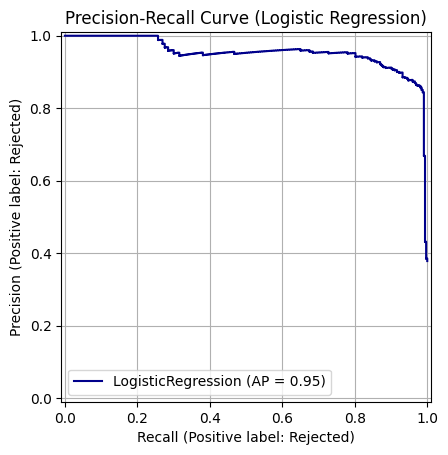

In [93]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(log_reg, X_test, y_test,color="darkblue")
plt.title("Precision-Recall Curve (Logistic Regression)")
plt.grid(True)
plt.show()

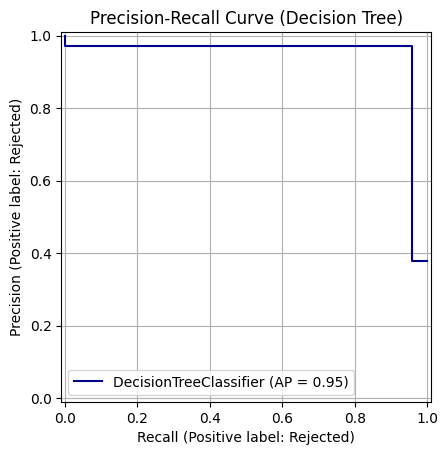

In [94]:
PrecisionRecallDisplay.from_estimator(dt, X_test, y_test,color="darkblue")
plt.title("Precision-Recall Curve (Decision Tree)")
plt.grid(True)
plt.show()

## 9. Handling Class Imbalance with SMOTE
applying smote on training data

smote can
Model predict the minority class (Rejected loans) more often.
 & Improves Recall for that class (fewer false negatives).


In [68]:
!pip install imbalanced-learn


In [70]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", y_train_res.value_counts().to_dict())

Before SMOTE: {'Approved': 2125, 'Rejected': 1290}
After SMOTE: {'Rejected': 2125, 'Approved': 2125}


## 10. Training models again:
-  using balanced data
- logistic regression

In [71]:
log_reg_bal = LogisticRegression(max_iter=1000)
log_reg_bal.fit(X_train_res, y_train_res)
y_pred_log_bal = log_reg_bal.predict(X_test)

print(" Logistic Regression (with SMOTE) ")
print(classification_report(y_test, y_pred_log_bal))

 Logistic Regression (with SMOTE) 
              precision    recall  f1-score   support

    Approved       0.95      0.94      0.95       531
    Rejected       0.91      0.92      0.91       323

    accuracy                           0.93       854
   macro avg       0.93      0.93      0.93       854
weighted avg       0.93      0.93      0.93       854



### - Decision Tree

In [72]:
dt_bal = DecisionTreeClassifier(random_state=42)
dt_bal.fit(X_train_res, y_train_res)
y_pred_dt_bal = dt_bal.predict(X_test)

print("\n Decision Tree (with SMOTE) ")
print(classification_report(y_test, y_pred_dt_bal))


 Decision Tree (with SMOTE) 
              precision    recall  f1-score   support

    Approved       0.98      0.98      0.98       531
    Rejected       0.97      0.96      0.97       323

    accuracy                           0.98       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



### - Visualizing Classification Reports:

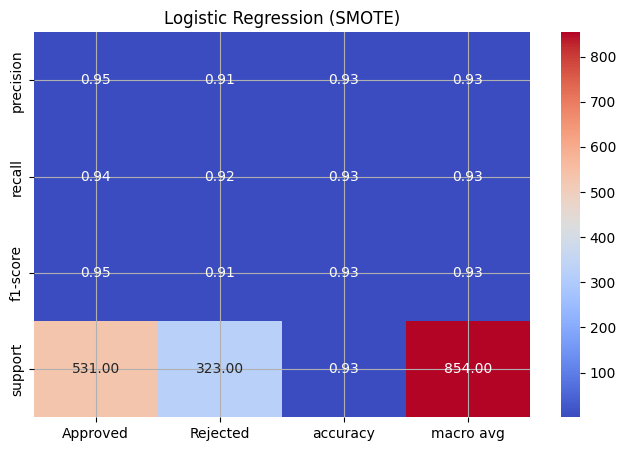

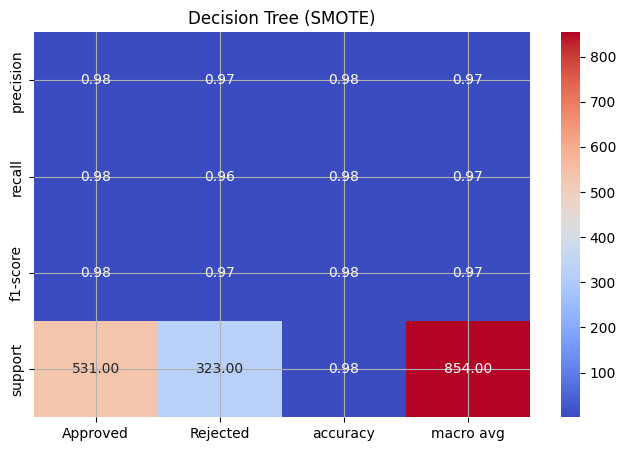

In [97]:
def plot_classification_report(y_true, y_pred, title="Classification Report"):
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()

    plt.figure(figsize=(8,5))
    sns.heatmap(df_report.iloc[:-1, :].T, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(title)
    plt.grid(True)
    plt.show()
plot_classification_report(y_test, y_pred_log_bal, "Logistic Regression (SMOTE)")
plot_classification_report(y_test, y_pred_dt_bal, "Decision Tree (SMOTE)")

### - Importance of features:

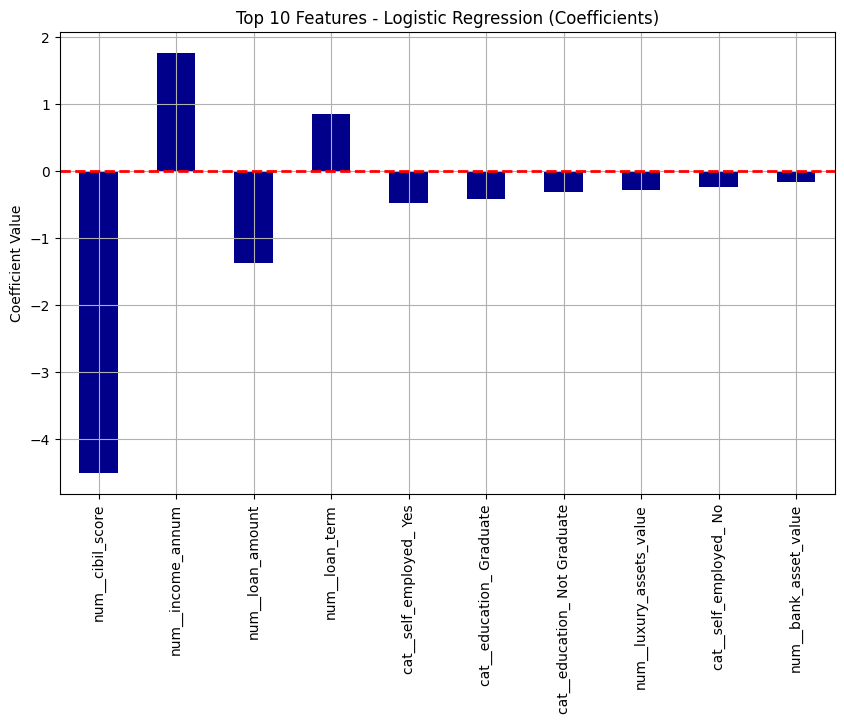

In [109]:
feature_names = preprocessor.get_feature_names_out()

log_reg_importance = pd.Series(
    log_reg_bal.coef_[0], index=feature_names
).sort_values(key=abs, ascending=False)

plt.figure(figsize=(10,6))
log_reg_importance.head(10).plot(kind='bar', color='darkblue')
plt.title("Top 10 Features - Logistic Regression (Coefficients)")
plt.axhline(0, color='red', linestyle='--',linewidth=2)  # zero line
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.show()

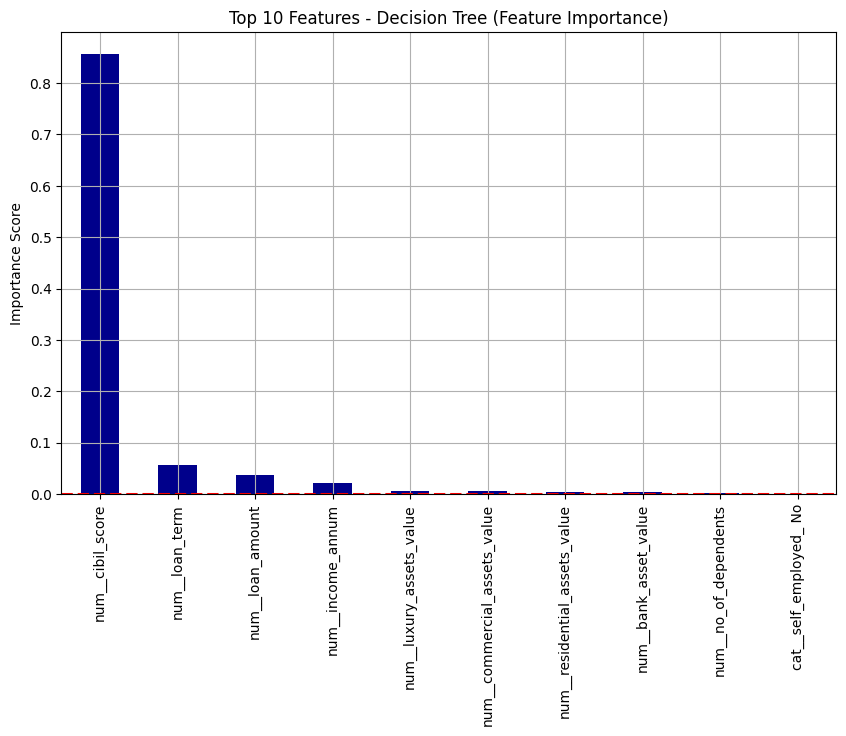

In [108]:
dt_importance = pd.Series(
    dt_bal.feature_importances_, index=feature_names
).sort_values(ascending=False)

plt.figure(figsize=(10,6))
dt_importance.head(10).plot(kind='bar', color='darkblue')
plt.title("Top 10 Features - Decision Tree (Feature Importance)")
plt.ylabel("Importance Score")
plt.axhline(0, color='red', linestyle='--',linewidth=2.2)  # zero line
plt.grid(True)
plt.show()

In [80]:
import joblib

joblib.dump(log_reg_bal, "loan_approval_reg_model.pkl")
print("Logistic Regression model saved!")

joblib.dump(dt_bal, "loan_approval_dt_model.pkl")
print("Decision Tree model saved!")

Logistic Regression model saved!
Decision Tree model saved!


## 11. Prediction :



#### Logistic Regression Model:

In [82]:
reg_model = joblib.load("loan_approval_reg_model.pkl")

samples = X_test[:5]
print("Prediction:", reg_model.predict(samples))

Prediction: ['Approved' 'Approved' 'Approved' 'Approved' 'Approved']


#### Decision Tree Model:

In [83]:
dt_model = joblib.load("loan_approval_dt_model.pkl")

samples = X_test[:5]
print("Prediction:", dt_model.predict(samples))

Prediction: ['Approved' 'Approved' 'Approved' 'Rejected' 'Approved']


## 12. Key Insights 
### Decision Tree (Feature Importance Plot)
#### Key Observations:
- cibil_score dominates with ~0.87 importance, meaning the decision tree almost entirely relies on this variable for splits.

- The next features (loan_term, loan_amount, income_annum) have very low importance, indicating they barely matter in comparison.

- Many features present in logistic regression (like categorical ones: education, self_employed) are nearly ignored here.

#### Key Takeaways:
- Accuracy alone is misleading in imbalanced datasets.

- Precision, Recall, and F1-score provide a much clearer picture.

- Using SMOTE and threshold tuning, we improved the model’s ability to detect risky loans, making it more useful for real-world banking applications.


### Logistic Regression (Coefficient Plot)
#### Key Observations:
- cibil_score has the strongest negative coefficient, meaning higher CIBIL scores decrease the probability of being in the "default/high-risk" class (which makes sense in lending).

- income_annum has a positive influence. This means higher income increases loan approval chances.

- Other features like loan_amount and loan_term have moderate negative effects, suggesting larger loans or longer terms slightly reduce approval chances.

-  Some categorical variables (self_employed_Yes, education_Graduate) contribute positively, but their impact is relatively small compared to CIBIL and income.

## 13. Saving Data File

In [111]:
import joblib
joblib.dump(dt_model, 'task4_Loan Approval_Prediction_Description.pkl')

['task4_Loan Approval_Prediction_Description.pkl']

## 14. Task Completion 
- Load and explore the dataset (shape, structure, missing values).  
- Clean and preprocess data (handle missing values, encode categorical features).  
- Analyze class imbalance and apply techniques like **SMOTE** or class weighting.  
- Train classification models: **Logistic Regression** and **Decision Tree**.  
- Evaluate models using **precision, recall, F1-score, confusion matrix**.  
- Compare results of both models.  
- **Bonus:** Try hyperparameter tuning and alternative resampling methods (e.g., ADASYN, undersampling).  